In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [2]:
# Load dataset
df = pd.read_csv('../data/Dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (1552210, 44)
Columns: ['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID']

First few rows:


,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [3]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Pct': missing_pct.values
}).sort_values('Missing_Pct', ascending=False)

print(f"Total missing values: {missing_data.sum():,}")
print(f"Overall missing percentage: {(missing_data.sum() / df.size) * 100:.1f}%")
print(f"\nTop 15 columns with missing data:")
missing_df.head(15)


Total missing values: 43,512,155
Overall missing percentage: 63.7%

Top 15 columns with missing data:


,Column,Missing_Count,Missing_Pct
22,Bilirubin_direct,1549220,99.807371
34,Fibrinogen,1541968,99.340167
29,TroponinI,1537429,99.047745
28,Bilirubin_total,1529069,98.509158
18,Alkalinephos,1527269,98.393194
16,AST,1527027,98.377604
24,Lactate,1510764,97.329872
32,PTT,1506511,97.055875
15,SaO2,1498649,96.549372
9,EtCO2,1494574,96.286843


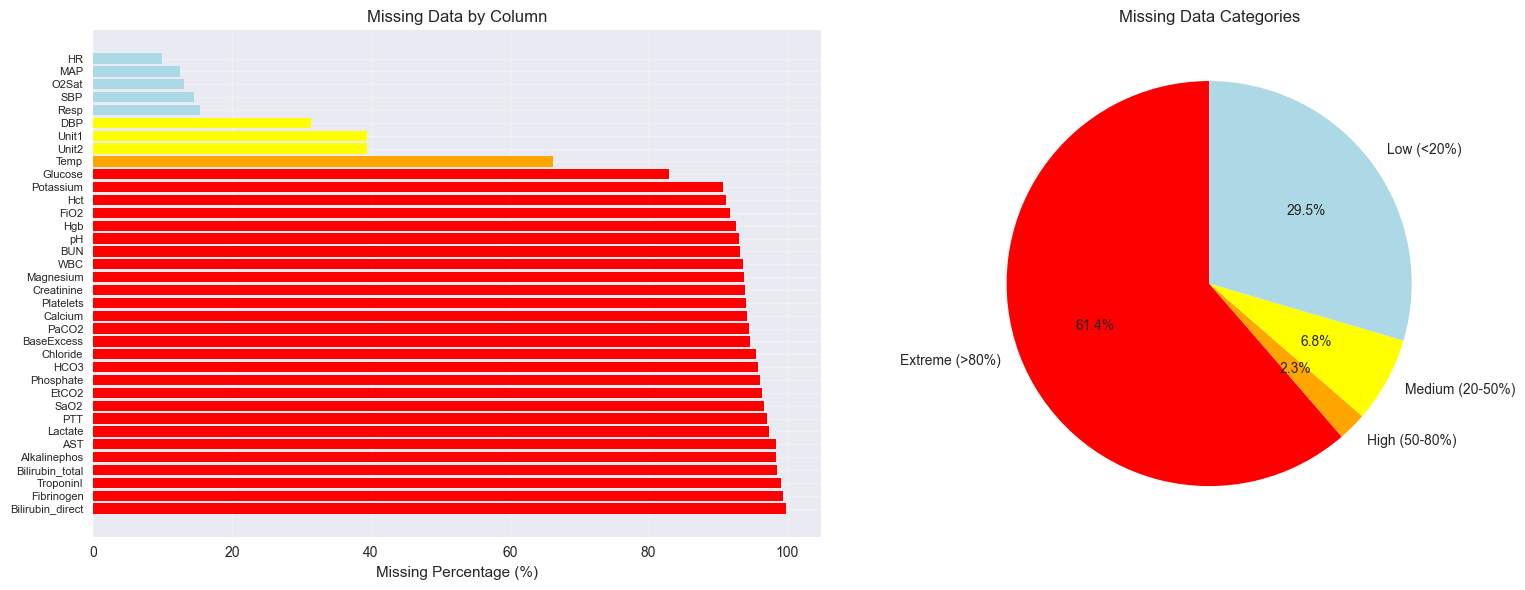

Missing data summary:
  Extreme (>80%): 27 columns
  High (50-80%): 1 columns
  Medium (20-50%): 3 columns
  Low (<20%): 13 columns


In [4]:
# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of top 20 missing columns
top_missing = missing_df.head(36)
colors = ['red' if x > 80 else 'orange' if x > 50 else 'yellow' if x > 20 else 'lightblue' 
          for x in top_missing['Missing_Pct']]

axes[0].barh(range(len(top_missing)), top_missing['Missing_Pct'], color=colors)
axes[0].set_yticks(range(len(top_missing)))
axes[0].set_yticklabels(top_missing['Column'], fontsize=8)
axes[0].set_xlabel('Missing Percentage (%)')
axes[0].set_title('Missing Data by Column')
axes[0].grid(True, alpha=0.3)

# Missing data categories
categories = ['Extreme (>80%)', 'High (50-80%)', 'Medium (20-50%)', 'Low (<20%)']
cat_counts = [
    sum(missing_df['Missing_Pct'] > 80),
    sum((missing_df['Missing_Pct'] > 50) & (missing_df['Missing_Pct'] <= 80)),
    sum((missing_df['Missing_Pct'] > 20) & (missing_df['Missing_Pct'] <= 50)),
    sum(missing_df['Missing_Pct'] <= 20)
]

axes[1].pie(cat_counts, labels=categories, autopct='%1.1f%%', 
           colors=['red', 'orange', 'yellow', 'lightblue'], startangle=90)
axes[1].set_title('Missing Data Categories')

plt.tight_layout()
plt.show()

print(f"Missing data summary:")
for cat, count in zip(categories, cat_counts):
    print(f"  {cat}: {count} columns")


In [5]:
# Check for time-series structure
if 'Patient_ID' in df.columns and 'Hour' in df.columns:
    print("✅ Time-series data detected")
    print(f"Patients: {df['Patient_ID'].nunique():,}")
    print(f"Time range: {df['Hour'].min()} to {df['Hour'].max()} hours")
    print(f"Avg observations per patient: {len(df) / df['Patient_ID'].nunique():.1f}")
    
    # Sample patient data
    sample_patient = df[df['Patient_ID'] == df['Patient_ID'].iloc[0]].sort_values('Hour')
    print(f"\nSample patient {sample_patient['Patient_ID'].iloc[0]} data:")
    print(sample_patient[['Hour', 'HR', 'Temp', 'SBP', 'DBP']].head(8))
else:
    print("❌ No time-series structure found")
    print("Available columns:", list(df.columns))


✅ Time-series data detected
Patients: 40,336
Time range: 0 to 335 hours
Avg observations per patient: 38.5

Sample patient 17072 data:
   Hour    HR   Temp    SBP   DBP
0     0   NaN    NaN    NaN   NaN
1     1  65.0    NaN    NaN   NaN
2     2  78.0    NaN    NaN   NaN
3     3  73.0    NaN    NaN   NaN
4     4  70.0    NaN  129.0  69.0
5     5  62.0    NaN  124.0  61.0
6     6  61.0    NaN  101.0  58.0
7     7  68.0  35.78  142.0  78.0


In [6]:
# Forward-fill + Backward-fill imputation strategy
if 'Patient_ID' in df.columns and 'Hour' in df.columns:
    print("Applying forward-fill + backward-fill imputation...")
    
    # Get feature columns (exclude ID and target)
    feature_cols = [col for col in df.columns if col not in ["SepsisLabel", "Patient_ID", "Hour"]]
    print(f"Processing {len(feature_cols)} feature columns")
    
    # Before imputation stats
    missing_before = df[feature_cols].isnull().sum().sum()
    print(f"Missing values before: {missing_before:,}")
    
    # Apply forward-fill + backward-fill strategy
    df_clean = df.copy()
    df_clean[feature_cols] = (
        df_clean.sort_values(["Patient_ID", "Hour"])
        .groupby("Patient_ID")[feature_cols]
        .ffill()      # Forward-fill first
        .bfill()      # Then backward-fill remaining gaps
        .fillna(0)    # Only fill with 0 if still missing
    )
    
    # After imputation stats
    missing_after = df_clean[feature_cols].isnull().sum().sum()
    print(f"Missing values after: {missing_after:,}")
    print(f"Data completeness: {((df_clean.size - missing_after) / df_clean.size) * 100:.1f}%")
    
    # Show example
    print(f"\nExample - Patient {sample_patient['Patient_ID'].iloc[0]}:")
    sample_clean = df_clean[df_clean['Patient_ID'] == sample_patient['Patient_ID'].iloc[0]].sort_values('Hour')
    print("Before imputation:")
    print(sample_patient[['Hour', 'HR', 'Temp', 'SBP']].head(8).to_string(index=False))
    print("\nAfter forward-fill + backward-fill:")
    print(sample_clean[['Hour', 'HR', 'Temp', 'SBP']].head(8).to_string(index=False))
    
    print("\n✅ Forward-fill + backward-fill completed!")
    print("Strategy: Forward-fill → Backward-fill → Fill with 0 (if needed)")
else:
    print("❌ Cannot apply imputation - missing time-series columns")


Applying forward-fill + backward-fill imputation...
Processing 41 feature columns
Missing values before: 43,512,155
Missing values after: 0
Data completeness: 100.0%

Example - Patient 17072:
Before imputation:
 Hour   HR  Temp   SBP
    0  NaN   NaN   NaN
    1 65.0   NaN   NaN
    2 78.0   NaN   NaN
    3 73.0   NaN   NaN
    4 70.0   NaN 129.0
    5 62.0   NaN 124.0
    6 61.0   NaN 101.0
    7 68.0 35.78 142.0

After forward-fill + backward-fill:
 Hour   HR  Temp   SBP
    0 65.0 35.78 129.0
    1 65.0 35.78 129.0
    2 78.0 35.78 129.0
    3 73.0 35.78 129.0
    4 70.0 35.78 129.0
    5 62.0 35.78 124.0
    6 61.0 35.78 101.0
    7 68.0 35.78 142.0

✅ Forward-fill + backward-fill completed!
Strategy: Forward-fill → Backward-fill → Fill with 0 (if needed)


In [7]:
# Save cleaned dataset
if 'df_clean' in locals():
    output_path = "../data/cleaned_dataset.csv"
    df_clean.to_csv(output_path, index=False)
    print(f"Cleaned dataset saved to: {output_path}")
    print(f"Final shape: {df_clean.shape}")
    print(f"Ready for modeling!")
else:
    print("No cleaned dataset to save")


Cleaned dataset saved to: ../data/cleaned_dataset.csv
Final shape: (1552210, 44)
Ready for modeling!
